# PRCP-1018-BikeRental

## Problem Statement

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Prediction of daily bike rental count based on the environmental and seasonal settings.


## Dataset Description:
Bike sharing systems are a new version of traditional bike rentals where the whole process from membership, rental and return back has been automated. Through these systems, users are easily able to rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.


## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


## Reading the Datsets

In [2]:
df_daily =pd.read_csv('day_bike_rental.csv')

df_hourly =pd.read_csv('hour_bike_rental.csv')


## Basic Checks

**For Day-wise data**

In [3]:
df_daily.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
df_daily.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [5]:
df_daily.shape

(731, 16)

In [6]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df_daily.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

**For Hour-wise Data**

In [8]:
df_hourly.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [9]:
df_hourly.tail()

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49

In [10]:
df_hourly.shape

(17379, 17)

In [11]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
df_hourly.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

**Attribute Information:**
Both the files df_rental_hour and df_rental_day have the following fields, except hr which is not available in df_rental_day
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if neither weekend nor holiday, it is 1; otherwise 0.
- weathersit : Weather Conditons as follows:
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Data Manipulation and Cleaning

**Renaming the features from both the datasets for better understanding**

In [13]:
df_hourly.rename(columns={"instant":"record_index","hr":"hour","dteday":"day_date", "yr":"year", "temp":"norm_temp_hr",
                          "mnth":"month", "weathersit":"weather_sit","hum":"norm_humidity_hr", "atemp":"norm_feel_temp_hr","windspeed":"norm_windspeed_hr","casual":"casual_hr", 
                          "registered":"registered_hr", "cnt": "count_hr" }, inplace=True)

In [14]:
df_hourly.columns

Index(['record_index', 'day_date', 'season', 'year', 'month', 'hour',
       'holiday', 'weekday', 'workingday', 'weather_sit', 'norm_temp_hr',
       'norm_feel_temp_hr', 'norm_humidity_hr', 'norm_windspeed_hr',
       'casual_hr', 'registered_hr', 'count_hr'],
      dtype='object')

In [15]:
df_daily.rename(columns={"instant":"record_index","dteday":"day_date", "yr":"year", "temp":"norm_temp_daily",
                          "mnth":"month", "weathersit":"weather_sit","windspeed":"norm_windspeed_daily", 'casual':'casual_daily',"hum":"norm_humidity_daily", "atemp":"norm_feel_temp_daily", 
                          "registered":"registered_daily", "cnt": "count_daily" }, inplace=True)

In [16]:
df_daily.columns

Index(['record_index', 'day_date', 'season', 'year', 'month', 'holiday',
       'weekday', 'workingday', 'weather_sit', 'norm_temp_daily',
       'norm_feel_temp_daily', 'norm_humidity_daily', 'norm_windspeed_daily',
       'casual_daily', 'registered_daily', 'count_daily'],
      dtype='object')

**Riverting back normalised Temperatures values to regular values**

In [17]:
#temp = ((t_max-t_min)*norm_temp)+t_min
#t_max= 39 
#t_min= -8
#temp= (norm_temp*47)-8

In [18]:
temp_hr = (df_hourly['norm_temp_hr']*47)-8
feel_temp_hr = (df_hourly['norm_feel_temp_hr']*47)-8

In [19]:
df_hourly['temp_hr']= temp_hr
df_hourly['feel_temp_hr'] = feel_temp_hr
df_hourly.head(2)

record_index    day_date  season  year  month  hour  holiday  weekday  \
0             1  2011-01-01       1     0      1     0        0        6   
1             2  2011-01-01       1     0      1     1        0        6   

   workingday  weather_sit  norm_temp_hr  norm_feel_temp_hr  norm_humidity_hr  \
0           0            1          0.24             0.2879              0.81   
1           0            1          0.22             0.2727              0.80   

   norm_windspeed_hr  casual_hr  registered_hr  count_hr  temp_hr  \
0                0.0          3             13        16     3.28   
1                0.0          8             32        40     2.34   

   feel_temp_hr  
0        5.5313  
1        4.8169

In [20]:
temp_daily = (df_daily['norm_temp_daily']*47)-8
feel_temp_daily = (df_daily['norm_feel_temp_daily']*47)-8

In [21]:
df_daily['temp_daily']= temp_daily
df_daily['feel_temp_daily'] = feel_temp_daily
df_daily.head(2)

record_index    day_date  season  year  month  holiday  weekday  \
0             1  2011-01-01       1     0      1        0        6   
1             2  2011-01-02       1     0      1        0        0   

   workingday  weather_sit  norm_temp_daily  norm_feel_temp_daily  \
0           0            2         0.344167              0.363625   
1           0            2         0.363478              0.353739   

   norm_humidity_daily  norm_windspeed_daily  casual_daily  registered_daily  \
0             0.805833              0.160446           331               654   
1             0.696087              0.248539           131               670   

   count_daily  temp_daily  feel_temp_daily  
0          985    8.175849         9.090375  
1          801    9.083466         8.625733

- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)

In [22]:
humidity_hr= df_hourly['norm_humidity_hr']*100
humidity_daily= df_daily['norm_humidity_daily']*100

In [23]:
windspeed_hr = df_hourly['norm_windspeed_hr']*67
windspeed_daily = df_daily['norm_windspeed_daily']*67

In [24]:
df_daily['humidity_daily']= humidity_daily
df_daily['windspeed_daily'] = windspeed_daily
df_daily.head(2)

record_index    day_date  season  year  month  holiday  weekday  \
0             1  2011-01-01       1     0      1        0        6   
1             2  2011-01-02       1     0      1        0        0   

   workingday  weather_sit  norm_temp_daily  norm_feel_temp_daily  \
0           0            2         0.344167              0.363625   
1           0            2         0.363478              0.353739   

   norm_humidity_daily  norm_windspeed_daily  casual_daily  registered_daily  \
0             0.805833              0.160446           331               654   
1             0.696087              0.248539           131               670   

   count_daily  temp_daily  feel_temp_daily  humidity_daily  windspeed_daily  
0          985    8.175849         9.090375         80.5833        10.749882  
1          801    9.083466         8.625733         69.6087        16.652113

In [25]:
df_hourly['humidity_hr']= humidity_hr
df_hourly['windspeed_hr'] = windspeed_hr
df_hourly.head(2)

record_index    day_date  season  year  month  hour  holiday  weekday  \
0             1  2011-01-01       1     0      1     0        0        6   
1             2  2011-01-01       1     0      1     1        0        6   

   workingday  weather_sit  ...  norm_feel_temp_hr  norm_humidity_hr  \
0           0            1  ...             0.2879              0.81   
1           0            1  ...             0.2727              0.80   

   norm_windspeed_hr  casual_hr  registered_hr  count_hr  temp_hr  \
0                0.0          3             13        16     3.28   
1                0.0          8             32        40     2.34   

   feel_temp_hr  humidity_hr  windspeed_hr  
0        5.5313         81.0           0.0  
1        4.8169         80.0           0.0  

[2 rows x 21 columns]

**Converting some of the continuous features into categorical features for better Data Analysis**

In [26]:
df_hourly_eda= df_hourly.copy()

In [27]:
df_daily_eda= df_daily.copy()

In [28]:
df_hourly_eda['day_period'] = pd.cut(x=df_hourly['hour'], bins=[0, 5, 11, 17, 23],
                    labels=["Night", 'Morning', 'Afternoon',
                            'Evening'], include_lowest=True)

In [29]:
df_hourly_eda['year'].replace([0,1],['2011', '2012'], inplace=True)
df_hourly_eda['season'].replace([1,2,3,4],['Winter', 'Spring', 'Summer', 'Fall'], inplace=True)
df_hourly_eda['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May', 
                                                              'June','July','August','September', 'October',
                                                              'November', 'December'], inplace=True)
df_hourly_eda['weekday'].replace([0,1,2,3,4,5,6],["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"], inplace=True)
df_hourly_eda['holiday'].replace([0,1],['No Holiday', 'Holiday'], inplace=True)
df_hourly_eda['workingday'].replace([0,1],["No Working Day","Working Day"], inplace=True)
df_hourly_eda['weather_sit'].replace([1,2,3,4],['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow/Storm'], inplace=True)
df_hourly_eda.head()

record_index    day_date  season  year    month  hour     holiday  \
0             1  2011-01-01  Winter  2011  January     0  No Holiday   
1             2  2011-01-01  Winter  2011  January     1  No Holiday   
2             3  2011-01-01  Winter  2011  January     2  No Holiday   
3             4  2011-01-01  Winter  2011  January     3  No Holiday   
4             5  2011-01-01  Winter  2011  January     4  No Holiday   

    weekday      workingday          weather_sit  ...  norm_humidity_hr  \
0  Saturday  No Working Day  Clear/Partly Cloudy  ...              0.81   
1  Saturday  No Working Day  Clear/Partly Cloudy  ...              0.80   
2  Saturday  No Working Day  Clear/Partly Cloudy  ...              0.80   
3  Saturday  No Working Day  Clear/Partly Cloudy  ...              0.75   
4  Saturday  No Working Day  Clear/Partly Cloudy  ...              0.75   

   norm_windspeed_hr  casual_hr  registered_hr  count_hr  temp_hr  \
0                0.0          3             13        16     3.28   
1                0.0          8             32        40     2.34   
2                0.0          5             27        32     2.34   
3                0.0          3             10        13     3.28   
4                0.0          0              1         1     3.28   

   feel_temp_hr  humidity_hr  windspeed_hr  day_period  
0        5.5313         81.0           0.0       Night  
1        4.8169         80.0           0.0       Night  
2        4.8169         80.0           0.0       Night  
3        5.5313         75.0           0.0       Night  
4        5.5313         75.0           0.0       Night  

[5 rows x 22 columns]

In [30]:
df_hourly_eda.describe(include="O")

day_date  season   year  month     holiday   weekday   workingday  \
count        17379   17379  17379  17379       17379     17379        17379   
unique         731       4      2     12           2         7            2   
top     2011-01-01  Summer   2012    May  No Holiday  Saturday  Working Day   
freq            24    4496   8734   1488       16879      2512        11865   

                weather_sit  
count                 17379  
unique                    4  
top     Clear/Partly Cloudy  
freq                  11413

In [31]:
df_hourly_eda.columns

Index(['record_index', 'day_date', 'season', 'year', 'month', 'hour',
       'holiday', 'weekday', 'workingday', 'weather_sit', 'norm_temp_hr',
       'norm_feel_temp_hr', 'norm_humidity_hr', 'norm_windspeed_hr',
       'casual_hr', 'registered_hr', 'count_hr', 'temp_hr', 'feel_temp_hr',
       'humidity_hr', 'windspeed_hr', 'day_period'],
      dtype='object')

In [32]:
df_daily_eda['temp_ranges'] = pd.cut(x=df_daily_eda['temp_daily'], bins=[-8, 4, 8, 13, 18, 25, 29, 35, 41],
                    labels=["Very Cold", 'Cold', 'Cool','Slightly Cool', 'Comfortable','Slightly warm','Warm', 'Hot'], include_lowest=True)

In [33]:
df_daily_eda['year'].replace([0,1],['2011', '2012'], inplace=True)
df_daily_eda['season'].replace([1,2,3,4],['Winter', 'Spring', 'Summer', 'Fall'], inplace=True)
df_daily_eda['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May', 
                                                              'June','July','August','September', 'October',
                                                              'November', 'December'], inplace=True)
df_daily_eda['weekday'].replace([0,1,2,3,4,5,6],["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"], inplace=True)
df_daily_eda['holiday'].replace([0,1],['No Holiday', 'Holiday'], inplace=True)
df_daily_eda['workingday'].replace([0,1],["No Working Day","Working Day"], inplace=True)
df_daily_eda['weather_sit'].replace([1,2,3,4],['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow/Storm'], inplace=True)
df_daily_eda.head()

record_index    day_date  season  year    month     holiday    weekday  \
0             1  2011-01-01  Winter  2011  January  No Holiday   Saturday   
1             2  2011-01-02  Winter  2011  January  No Holiday     Sunday   
2             3  2011-01-03  Winter  2011  January  No Holiday     Monday   
3             4  2011-01-04  Winter  2011  January  No Holiday    Tuesday   
4             5  2011-01-05  Winter  2011  January  No Holiday  Wednesday   

       workingday          weather_sit  norm_temp_daily  ...  \
0  No Working Day          Mist/Cloudy         0.344167  ...   
1  No Working Day          Mist/Cloudy         0.363478  ...   
2     Working Day  Clear/Partly Cloudy         0.196364  ...   
3     Working Day  Clear/Partly Cloudy         0.200000  ...   
4     Working Day  Clear/Partly Cloudy         0.226957  ...   

   norm_humidity_daily  norm_windspeed_daily  casual_daily  registered_daily  \
0             0.805833              0.160446           331               654   
1             0.696087              0.248539           131               670   
2             0.437273              0.248309           120              1229   
3             0.590435              0.160296           108              1454   
4             0.436957              0.186900            82              1518   

   count_daily  temp_daily  feel_temp_daily  humidity_daily  windspeed_daily  \
0          985    8.175849         9.090375         80.5833        10.749882   
1          801    9.083466         8.625733         69.6087        16.652113   
2         1349    1.229108         0.902035         43.7273        16.636703   
3         1562    1.400000         1.969734         59.0435        10.739832   
4         1600    2.666979         2.775690         43.6957        12.522300   

   temp_ranges  
0         Cool  
1         Cool  
2    Very Cold  
3    Very Cold  
4    Very Cold  

[5 rows x 21 columns]

In [34]:
df_daily_eda.describe(include="O")

day_date  season  year    month     holiday   weekday   workingday  \
count          731     731   731      731         731       731          731   
unique         731       4     2       12           2         7            2   
top     2011-01-01  Summer  2012  January  No Holiday  Saturday  Working Day   
freq             1     188   366       62         710       105          500   

                weather_sit  
count                   731  
unique                    3  
top     Clear/Partly Cloudy  
freq                    463

# Exploratory Data Analysis

- Impact of whether the day is working day or not on Daily count.
- Impact of whether it's weekday or weekend or holiday on daily count.
- Month Wise Total Count of rentals
- Year wise total count
- Seasonal Impact on daily count with hue as year 0 and 1
- Feel temp and Normal Temp Relationship and it's impact on active users
- Does windspeed impact the active users
- Does humidity impact the sctive users 
- Normal Temperature impact on Daily Count
- Percentage of Registered and Casual users out of Total count.
- Hour wise total count and impact of weather situation
- When do we see more casual users (on holidays or Weekend or working days)

## Distribution plot for Numerical Features

In [35]:
df_daily_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   record_index          731 non-null    int64   
 1   day_date              731 non-null    object  
 2   season                731 non-null    object  
 3   year                  731 non-null    object  
 4   month                 731 non-null    object  
 5   holiday               731 non-null    object  
 6   weekday               731 non-null    object  
 7   workingday            731 non-null    object  
 8   weather_sit           731 non-null    object  
 9   norm_temp_daily       731 non-null    float64 
 10  norm_feel_temp_daily  731 non-null    float64 
 11  norm_humidity_daily   731 non-null    float64 
 12  norm_windspeed_daily  731 non-null    float64 
 13  casual_daily          731 non-null    int64   
 14  registered_daily      731 non-null    int64   
 15  count_

In [36]:
df_eda_dist = df_daily_eda[['humidity_daily', 'windspeed_daily', 'casual_daily', 'registered_daily', 'count_daily', 'temp_daily','feel_temp_daily']]

<Figure size 640x480 with 0 Axes>

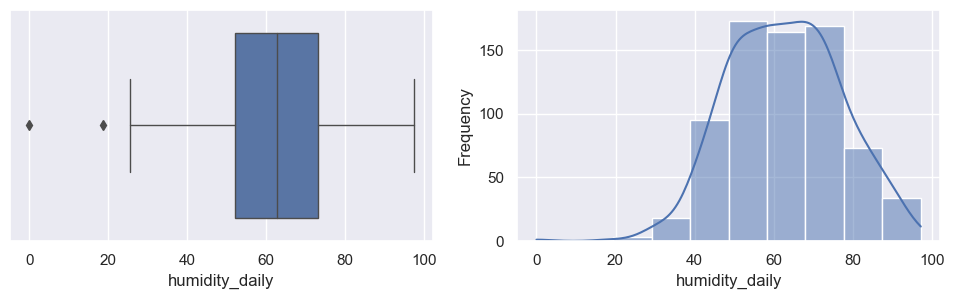

<Figure size 1200x300 with 0 Axes>

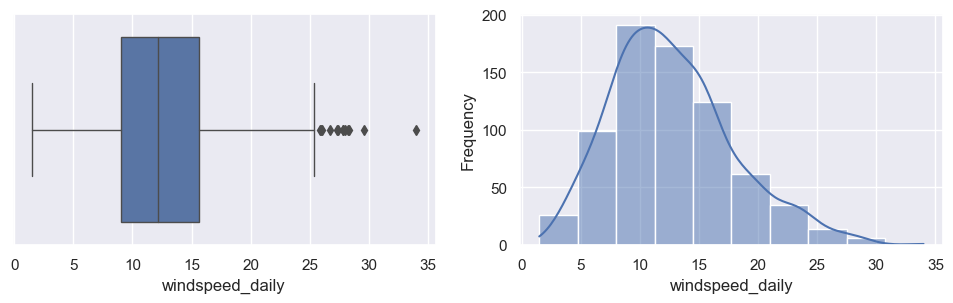

<Figure size 1200x300 with 0 Axes>

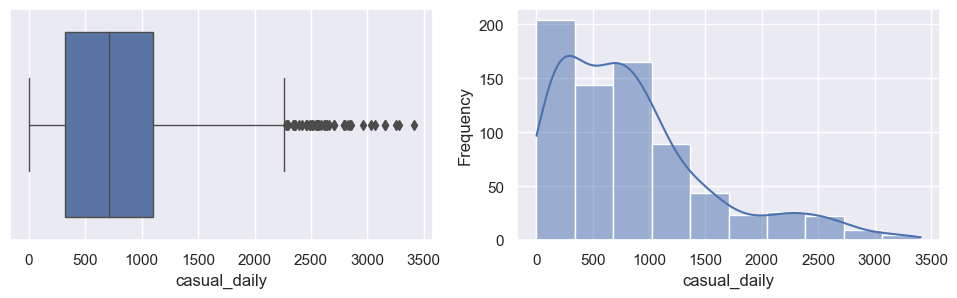

<Figure size 1200x300 with 0 Axes>

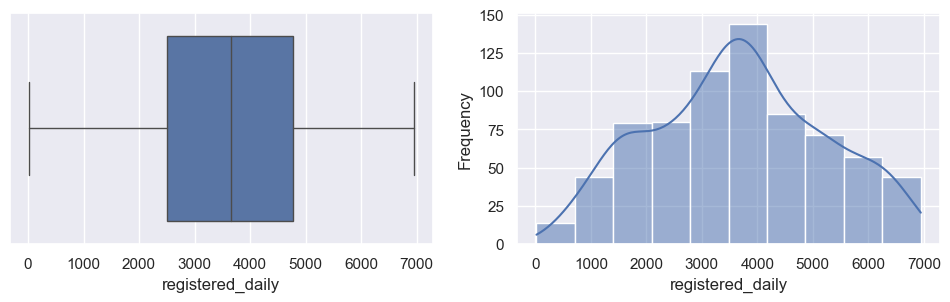

<Figure size 1200x300 with 0 Axes>

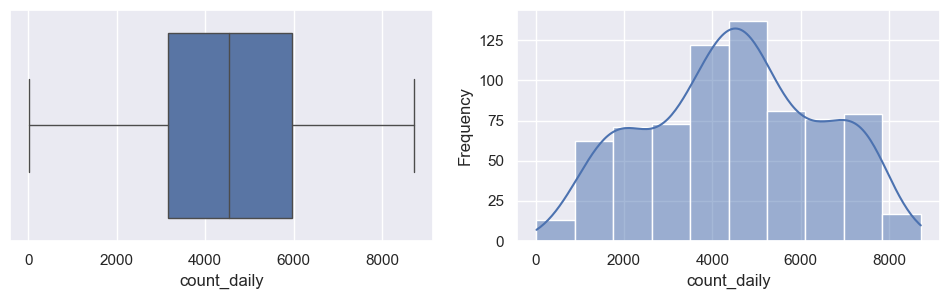

<Figure size 1200x300 with 0 Axes>

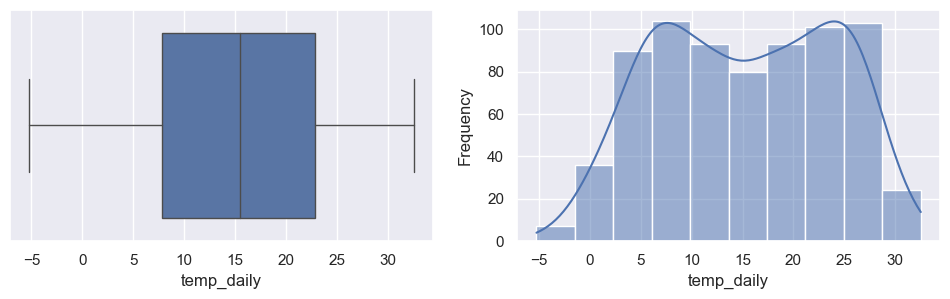

<Figure size 1200x300 with 0 Axes>

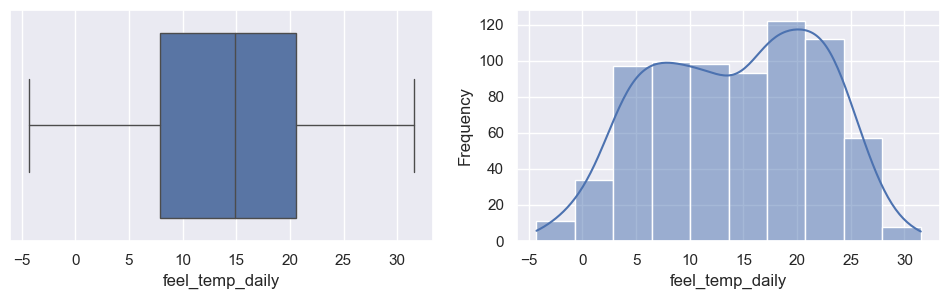

In [37]:
for i in df_eda_dist.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(12,3)})
    
    f, (ax_box, ax_hist) = plt.subplots(1,2, sharex=True)
    plt.gca().set(xlabel = i, ylabel='Frequency')
    sns.boxplot(df_eda_dist[i], ax=ax_box, linewidth = 1.0)
    sns.histplot(df_eda_dist[i], ax=ax_hist, bins= 10, kde=True)
    plt.show()

## Year-wise Total count of Bike Rentals

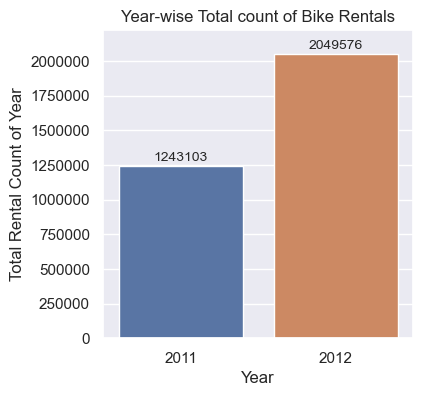

In [38]:
plt.figure(figsize=(4,4))
ax= sns.barplot(data=df_daily_eda,x="year", y="count_daily", estimator=sum,  errwidth=0)
ax.set(title= "Year-wise Total count of Bike Rentals", ylabel='Total Rental Count of Year', xlabel='Year')
plt.ticklabel_format(style='plain', axis='y')
for i in ax.containers:
    ax.bar_label(i, fmt = '%d', padding=1.8, fontsize=10)

## Month-wise Total count of Bike Rentals in 2011 and 2012 and it's percentage 

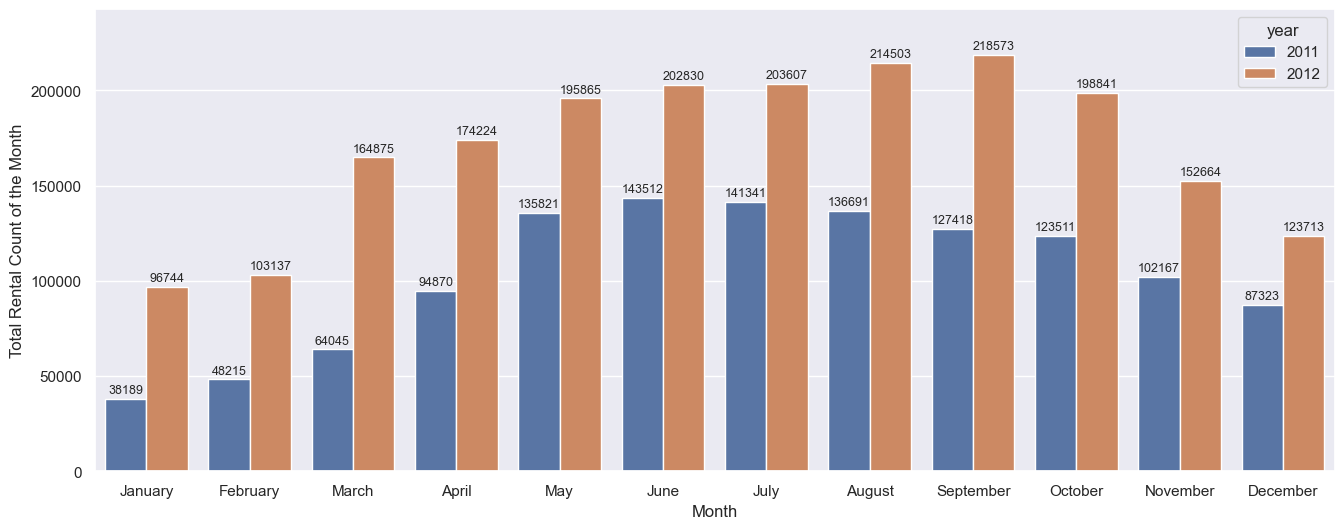

In [39]:
plt.figure(figsize=(16,6))
ax= sns.barplot(data=df_hourly_eda,x="month", y="count_hr", hue='year', estimator=sum,  errwidth=0)
ax.set(ylabel='Total Rental Count of the Month', xlabel='Month')
for i in ax.containers:
    ax.bar_label(i, padding=1.8, fontsize=9)

In [40]:
#Percentage of Total Count Month Wise
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(values=df_daily_eda.query("year=='2011'")['count_daily'], labels=df_daily_eda.query("year=='2011'")['month']),
              1, 1)
fig.add_trace(go.Pie(values=df_daily_eda.query("year=='2012'")['count_daily'], labels=df_daily_eda.query("year=='2012'")['month']),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.3, hoverinfo="label+percent")
fig.update_layout(
    title_text="Percentage of Total Rental Counts Month-wise",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2011', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='2012', x=0.81, y=0.5, font_size=20, showarrow=False)])

## Season-wise total Count in Year 2011 and 2012 and it's percentage

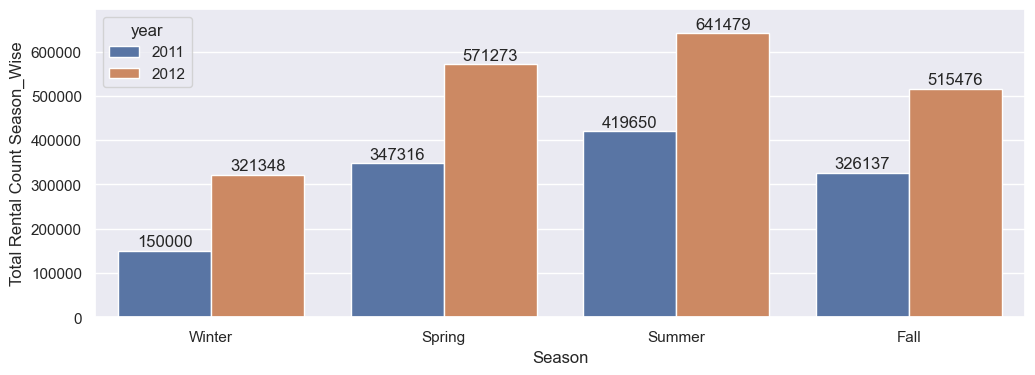

In [41]:
plt.figure(figsize=(12,4))
ax= sns.barplot(data=df_hourly_eda, x="season", y="count_hr", hue='year', estimator=sum, errwidth=0)
ax.set(ylabel='Total Rental Count Season_Wise', xlabel='Season')
for i in ax.containers:
    ax.bar_label(i, padding=1.0)

In [42]:

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(values=df_daily_eda.query("year=='2011'")['count_daily'], labels=df_daily_eda.query("year=='2011'")['season']),
              1, 1)
fig.add_trace(go.Pie(values=df_daily_eda.query("year=='2012'")['count_daily'], labels=df_daily_eda.query("year=='2012'")['season']),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.3, hoverinfo="label+percent")
fig.update_layout(
    title_text="Percentage of Total Rental Counts Season-wise",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2011',x=0.19, y=0.5,  font_size=20, showarrow=False),
                 dict(text='2012', x=0.81, y=0.5, font_size=20, showarrow=False)])

## Average Daily Count Season-Wise and Month Wise

[Text(0.5, 1.0, 'Line plot for Average Daily Count Vs Season')]

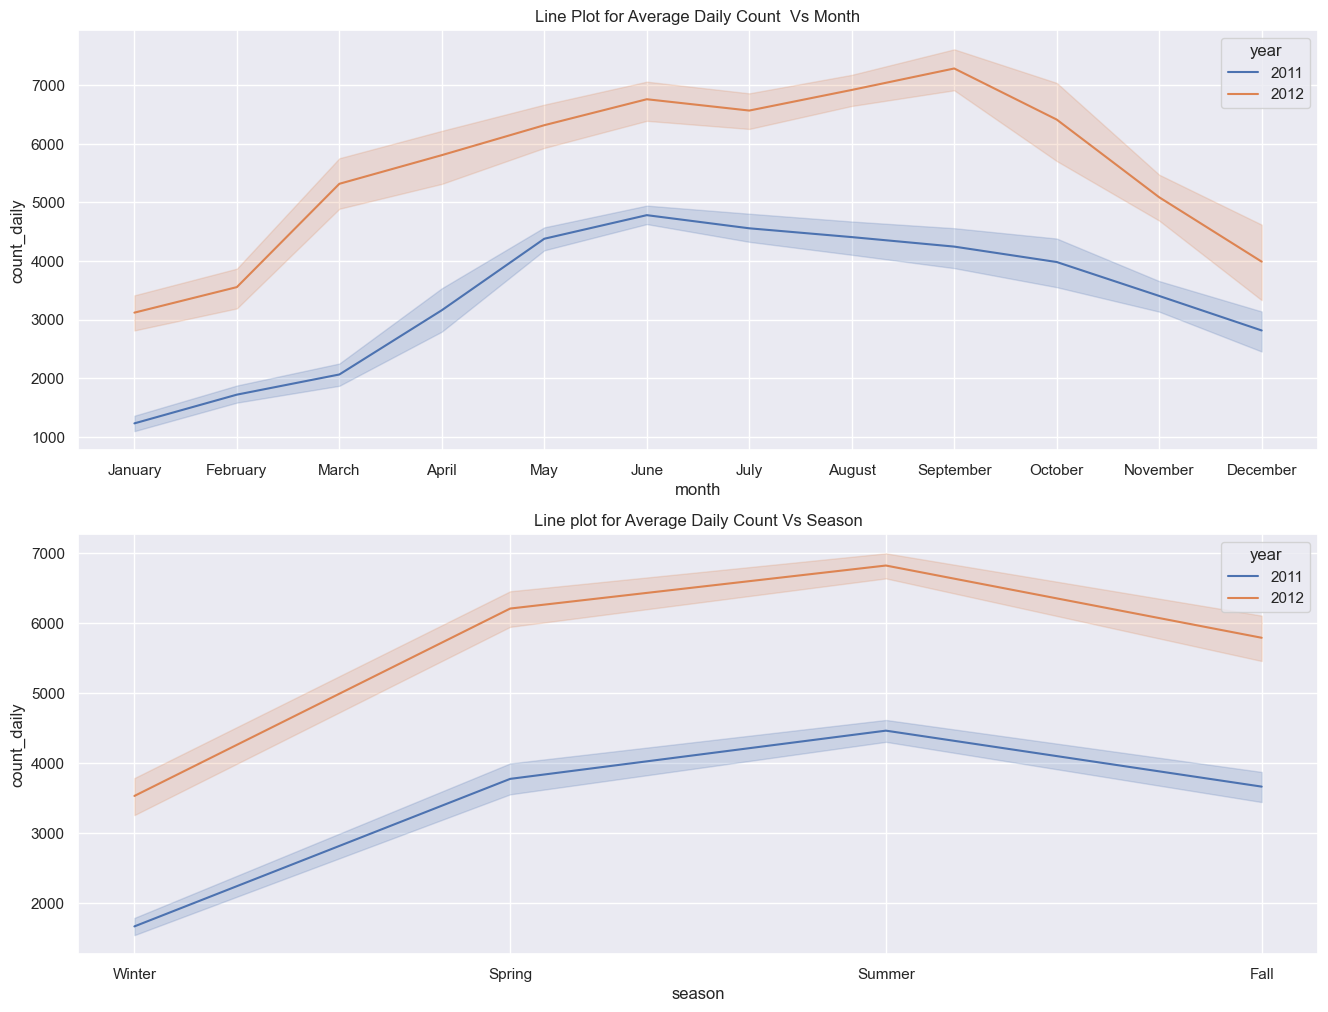

In [43]:
fig,axs = plt.subplots(2,1, figsize = (16,12))
sns.lineplot(data=df_daily_eda, x="month", y="count_daily",  hue='year', ax=axs[0]).set(title="Line Plot for Average Daily Count  Vs Month")
sns.lineplot(data=df_daily_eda, x="season", y="count_daily", hue='year', ax=axs[1]).set(title="Line plot for Average Daily Count Vs Season")

## Average Hourly Rental Count Season-Wise and Month Wise

[Text(0.5, 1.0, 'Line plot for Average Hourly Count Vs Season')]

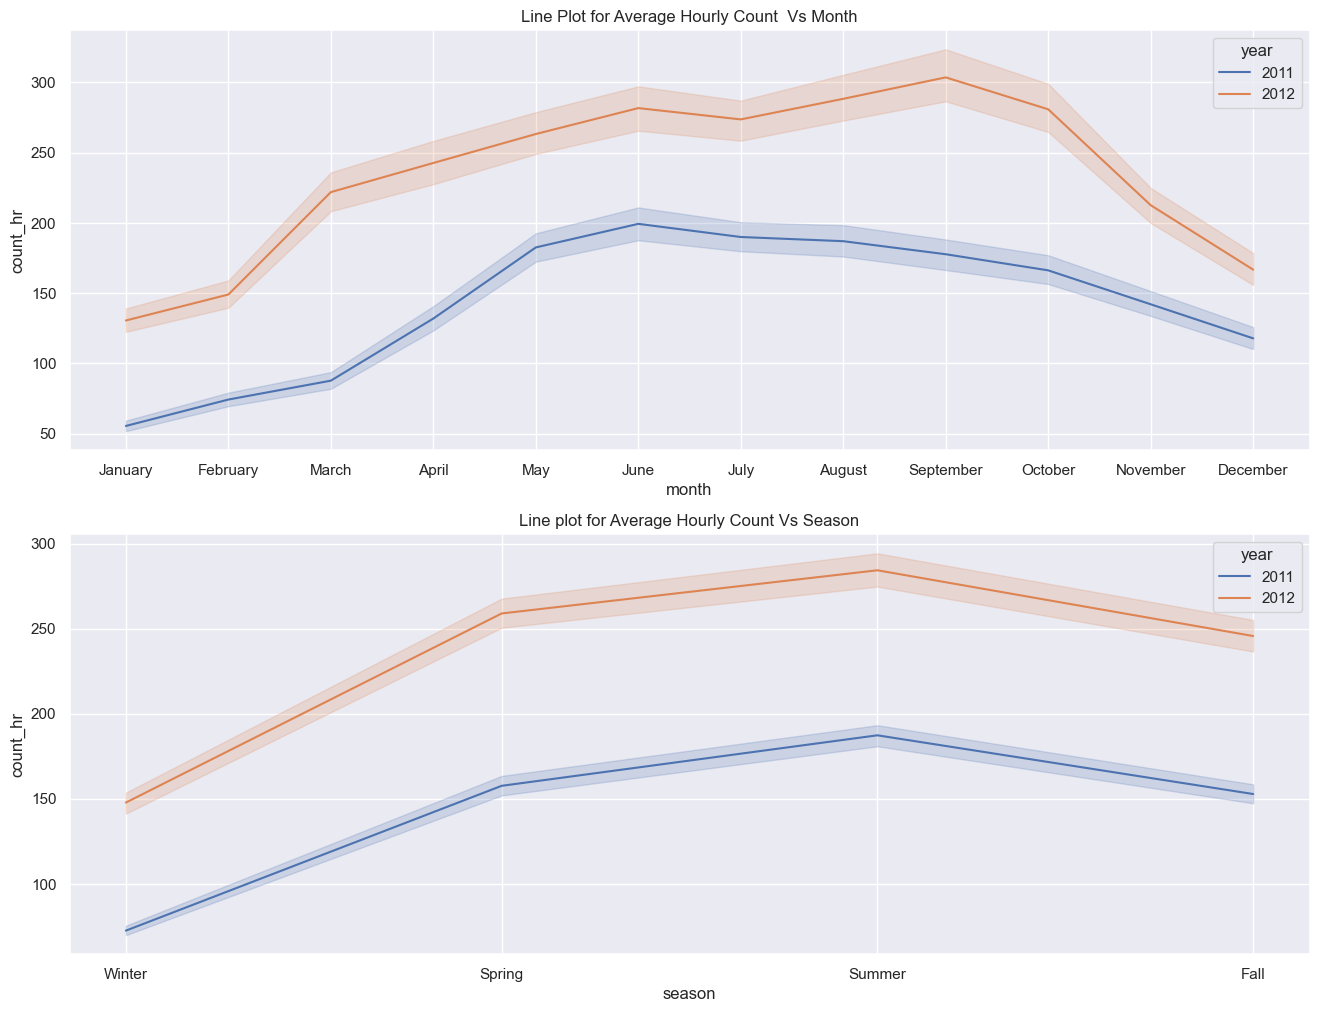

In [44]:
fig,axs = plt.subplots(2,1, figsize = (16,12))
sns.lineplot(data=df_hourly_eda, x="month", y="count_hr",  hue='year', ax=axs[0]).set(title="Line Plot for Average Hourly Count  Vs Month")
sns.lineplot(data=df_hourly_eda, x="season", y="count_hr", hue='year', ax=axs[1]).set(title="Line plot for Average Hourly Count Vs Season")

## Average Hourly Rentals according to Period of the Day

<AxesSubplot:xlabel='day_period', ylabel='count_hr'>

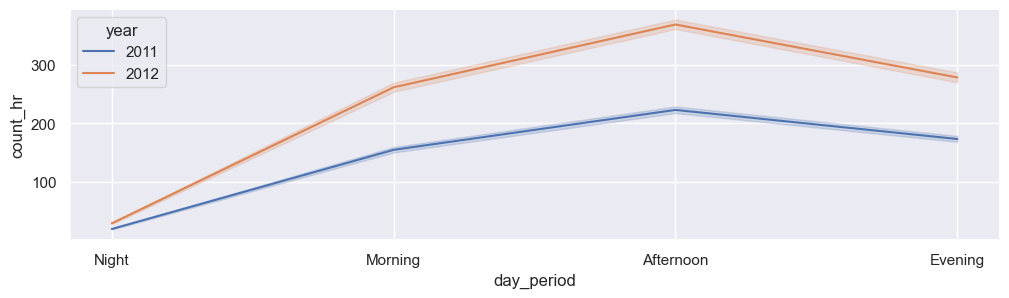

In [45]:
sns.lineplot(data=df_hourly_eda, x="day_period", y="count_hr", hue='year')

## Average Daily Rental Counts on Different Days

[Text(0, 0.5, 'Average Registered Rentals'), Text(0.5, 0, '')]

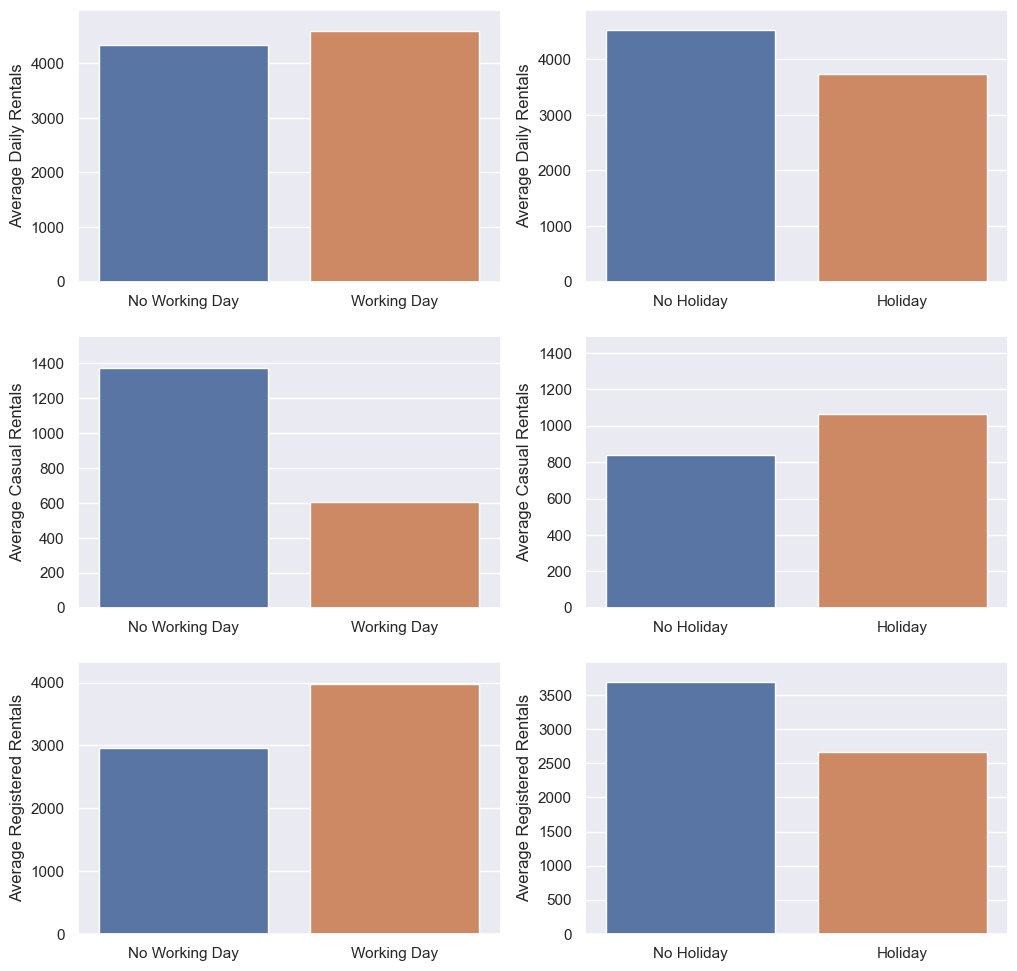

In [46]:
fig, ax = plt.subplots(3,2, figsize=(12, 12))
sns.barplot(x="workingday",  y="count_daily", data=df_daily_eda,errwidth=0, ax=ax[0,0]).set(ylabel='Average Daily Rentals', xlabel='')
sns.barplot(x="holiday",  y="count_daily", data=df_daily_eda, errwidth=0, ax=ax[0, 1]).set(ylabel='Average Daily Rentals', xlabel='')

sns.barplot(x="workingday",  y="casual_daily", data=df_daily_eda,errwidth=0, ax=ax[1,0]).set(ylabel='Average Casual Rentals', xlabel='')
sns.barplot(x="holiday",  y="casual_daily", data=df_daily_eda, errwidth=0, ax=ax[1, 1]).set(ylabel='Average Casual Rentals', xlabel='')

sns.barplot(x="workingday",  y="registered_daily", data=df_daily_eda,errwidth=0, ax=ax[2,0]).set(ylabel='Average Registered Rentals', xlabel='')
sns.barplot(x="holiday",  y="registered_daily", data=df_daily_eda, errwidth=0, ax=ax[2, 1]).set(ylabel='Average Registered Rentals', xlabel='')

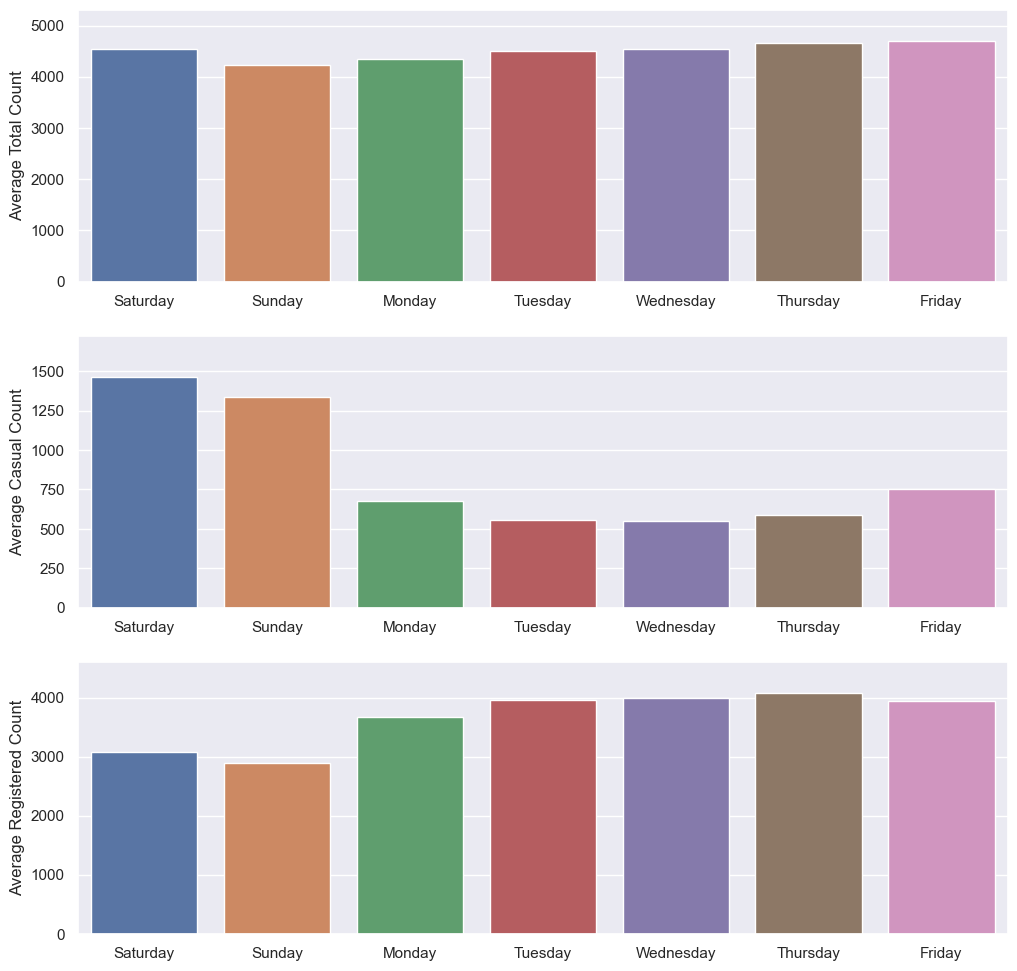

In [47]:
fig, axs = plt.subplots(3,1, figsize=(12, 12))
sns.barplot(x="weekday",  y="count_daily", data=df_daily_eda, errwidth=0, ax=axs[0]).set(ylabel='Average Total Count', xlabel='')
sns.barplot(x="weekday",  y="casual_daily", data=df_daily_eda, errwidth=0, ax=axs[1]).set(ylabel='Average Casual Count', xlabel='')
ax=sns.barplot(x="weekday",  y="registered_daily", data=df_daily_eda, errwidth=0, ax=axs[2]).set(ylabel='Average Registered Count', xlabel='')

## Average Hourly rental count according to Weather Situation

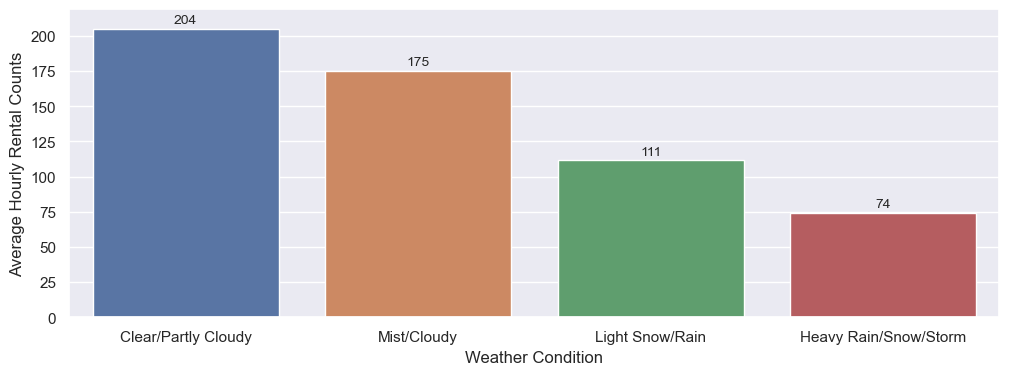

In [48]:
plt.figure(figsize=(12,4))
ax= sns.barplot(x="weather_sit",  y="count_hr", data=df_hourly_eda, errwidth=0)
ax.set(ylabel='Average Hourly Rental Counts', xlabel='Weather Condition')
for i in ax.containers:
    ax.bar_label(i, fmt = '%d', padding=1.8, fontsize=10)

In [49]:
df_daily_eda.columns

Index(['record_index', 'day_date', 'season', 'year', 'month', 'holiday',
       'weekday', 'workingday', 'weather_sit', 'norm_temp_daily',
       'norm_feel_temp_daily', 'norm_humidity_daily', 'norm_windspeed_daily',
       'casual_daily', 'registered_daily', 'count_daily', 'temp_daily',
       'feel_temp_daily', 'humidity_daily', 'windspeed_daily', 'temp_ranges'],
      dtype='object')

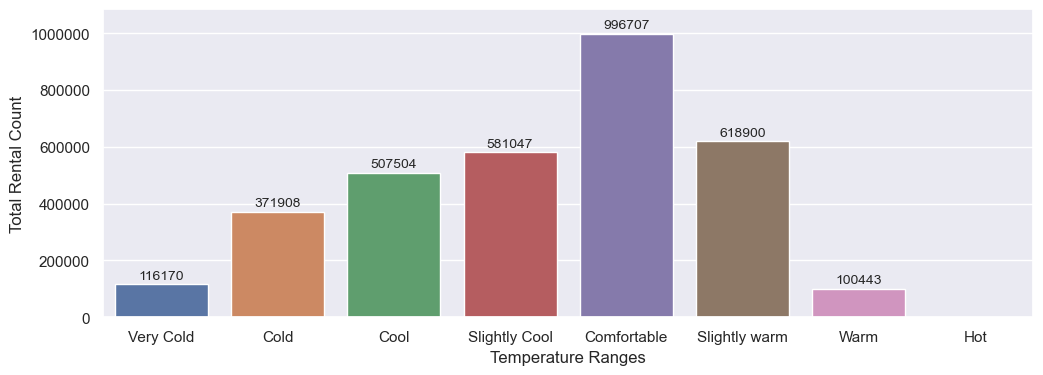

In [50]:
plt.figure(figsize=(12,4))
ax= sns.barplot(data=df_daily_eda, x="temp_ranges", y="count_daily" , estimator =sum, errwidth=0)
ax.set(ylabel='Total Rental Count', xlabel='Temperature Ranges')
plt.ticklabel_format(style='plain', axis='y')
for i in ax.containers:
    ax.bar_label(i, fmt = '%d', padding=1.8, fontsize=10)

**Temperature Ranges**

- Below 4.1 --- Very Cold
- 4.1 to 8.0 --- Cold
- 8.1 to 13.0 --- Cool
- 13.1 to 18.0 --- Slightly Cool
- 18.1 to 25.0 --- Comfortable
- 25.1 to 29.0 --- Slightly Warm
- 29.1 to 35.0 --- Warm
- 35.1 to 41.0 --- Hot

In [51]:
df_daily_eda.columns

Index(['record_index', 'day_date', 'season', 'year', 'month', 'holiday',
       'weekday', 'workingday', 'weather_sit', 'norm_temp_daily',
       'norm_feel_temp_daily', 'norm_humidity_daily', 'norm_windspeed_daily',
       'casual_daily', 'registered_daily', 'count_daily', 'temp_daily',
       'feel_temp_daily', 'humidity_daily', 'windspeed_daily', 'temp_ranges'],
      dtype='object')

In [52]:
import plotly.express as px

fig = px.scatter(df_daily_eda.query("year=='2011'"), x="temp_daily", y="count_daily",
	         size="humidity_daily", color="season",
                 hover_name="day_date", log_x=True, size_max=15)
fig.show()

In [53]:
import plotly.express as px

fig = px.scatter(df_daily_eda.query("year=='2012'"), x="temp_daily", y="count_daily",
	         size="humidity_daily", color="season",
                 hover_name="day_date", log_x=True, size_max=15)
fig.show()

In [54]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

table_data = df_daily_eda.groupby(by='season')['casual_daily', 'registered_daily', 'count_daily'].sum().reset_index()
table_data.rename(columns={"casual_daily":'casual', "registered_daily":"registered", 
                           "count_daily":"total"}, inplace=True)

fig=ff.create_table(table_data, height_constant=60)


trace1 = go.Scatter(x=table_data['season'], y=table_data['casual'],
                    marker=dict(color='#0099ff'),
                    name='Casual Rentals',
                    xaxis='x2', yaxis='y2')
trace2 = go.Scatter(x=table_data['season'], y=table_data['registered'],
                    marker=dict(color='#404040'),
                    name='Registered Rentals',
                    xaxis='x2', yaxis='y2')
trace3 = go.Scatter(x=table_data['season'], y=table_data['total'],
                    marker=dict(color='#FF0000'),
                    name='Total Rentals',
                    xaxis='x2', yaxis='y2')

fig.add_traces([trace1, trace2, trace3])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.xaxis.update({'domain': [0, .5]})
fig.layout.xaxis2.update({'domain': [0.6, 1.0]})

# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Rental Count'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':50, 'b':100})
fig.layout.update({'title': 'Season-Wise Bike Rentals'})

fig.show()

## Density Plot for Rental Couints

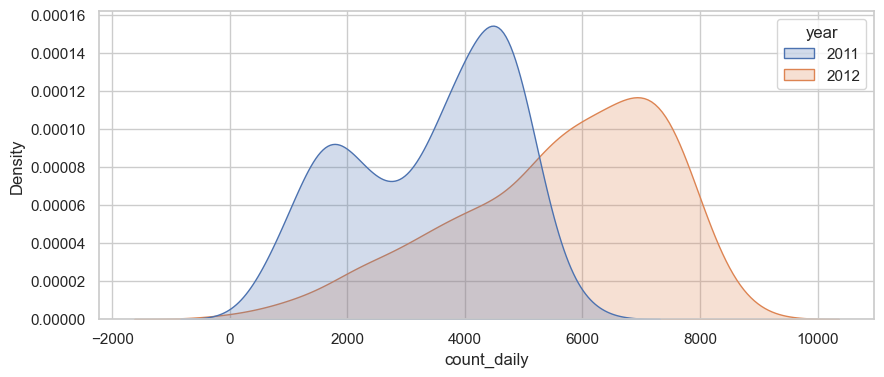

In [55]:
plt.figure(figsize=(10,4))
sns.set_style("whitegrid")
ax = sns.kdeplot(df_daily_eda['count_daily'], hue=df_daily_eda['year'], shade=True)
plt.show()

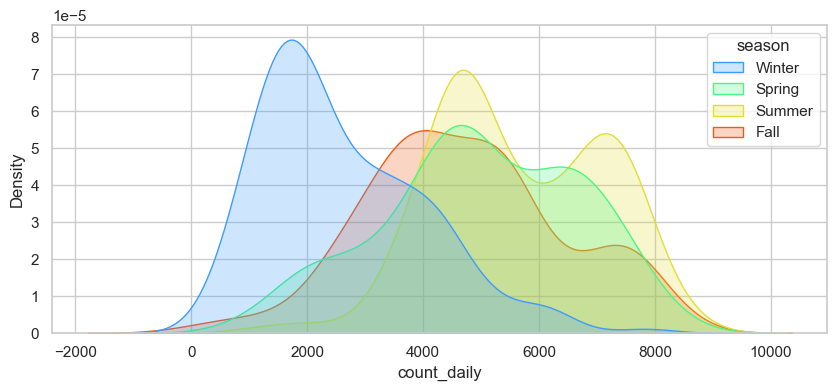

In [56]:
plt.figure(figsize=(10,4))
sns.set_style("whitegrid")
ax = sns.kdeplot(df_daily_eda['count_daily'], hue=df_daily_eda['season'], shade=True, palette='turbo')
plt.show()

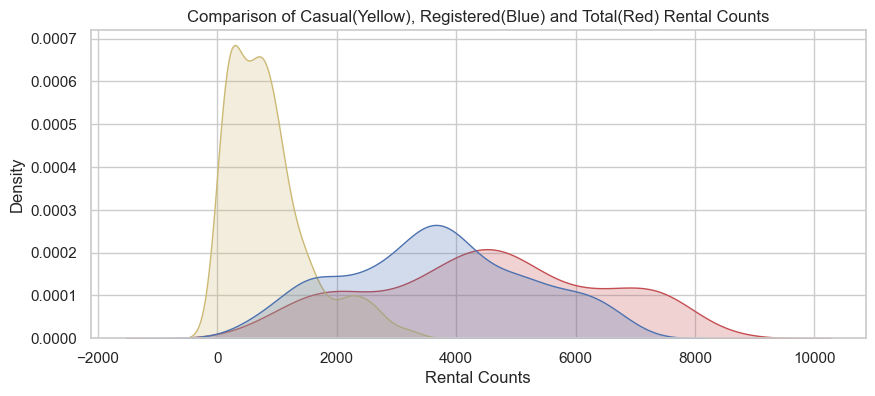

In [57]:
# Create a figure and set the size
# Set up the figure
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the kdeplot for count_daily, casual_daily, and registered_daily
sns.kdeplot(df_daily_eda['count_daily'], label='count_daily', ax=ax, color='r', shade=True)
sns.kdeplot(df_daily_eda['casual_daily'], label='casual_daily', ax=ax, color='y',  shade=True)
sns.kdeplot(df_daily_eda['registered_daily'], label='registered_daily', ax=ax, color='b',  shade=True)

# Add labels to the plot
ax.set_xlabel('Rental Counts')
ax.set_ylabel('Density')
ax.set_title('Comparison of Casual(Yellow), Registered(Blue) and Total(Red) Rental Counts')

# Show the plot
plt.show()

In [58]:
df_daily_eda[df_daily_eda['year']=='2011']

record_index    day_date  season  year     month     holiday    weekday  \
0               1  2011-01-01  Winter  2011   January  No Holiday   Saturday   
1               2  2011-01-02  Winter  2011   January  No Holiday     Sunday   
2               3  2011-01-03  Winter  2011   January  No Holiday     Monday   
3               4  2011-01-04  Winter  2011   January  No Holiday    Tuesday   
4               5  2011-01-05  Winter  2011   January  No Holiday  Wednesday   
..            ...         ...     ...   ...       ...         ...        ...   
360           361  2011-12-27  Winter  2011  December  No Holiday    Tuesday   
361           362  2011-12-28  Winter  2011  December  No Holiday  Wednesday   
362           363  2011-12-29  Winter  2011  December  No Holiday   Thursday   
363           364  2011-12-30  Winter  2011  December  No Holiday     Friday   
364           365  2011-12-31  Winter  2011  December  No Holiday   Saturday   

         workingday          weather_sit  norm_temp_daily  ...  \
0    No Working Day          Mist/Cloudy         0.344167  ...   
1    No Working Day          Mist/Cloudy         0.363478  ...   
2       Working Day  Clear/Partly Cloudy         0.196364  ...   
3       Working Day  Clear/Partly Cloudy         0.200000  ...   
4       Working Day  Clear/Partly Cloudy         0.226957  ...   
..              ...                  ...              ...  ...   
360     Working Day          Mist/Cloudy         0.325000  ...   
361     Working Day  Clear/Partly Cloudy         0.299130  ...   
362     Working Day  Clear/Partly Cloudy         0.248333  ...   
363     Working Day  Clear/Partly Cloudy         0.311667  ...   
364  No Working Day  Clear/Partly Cloudy         0.410000  ...   

     norm_humidity_daily  norm_windspeed_daily  casual_daily  \
0               0.805833              0.160446           331   
1               0.696087              0.248539           131   
2               0.437273              0.248309           120   
3               0.590435              0.160296           108   
4               0.436957              0.186900            82   
..                   ...                   ...           ...   
360             0.762500              0.188450           103   
361             0.503913              0.293961           255   
362             0.574167              0.119412           254   
363             0.636667              0.134337           491   
364             0.615833              0.220154           665   

     registered_daily  count_daily  temp_daily  feel_temp_daily  \
0                 654          985    8.175849         9.090375   
1                 670          801    9.083466         8.625733   
2                1229         1349    1.229108         0.902035   
3                1454         1562    1.400000         1.969734   
4                1518         1600    2.666979         2.775690   
..                ...          ...         ...              ...   
360              1059         1162    7.275000         7.398751   
361              2047         2302    6.059110         5.158778   
362              2169         2423    3.671651         4.402924   
363              2508         2999    6.648349         6.984164   
364              1820         2485   11.270000        11.463687   

     humidity_daily  windspeed_daily  temp_ranges  
0           80.5833        10.749882         Cool  
1           69.6087        16.652113         Cool  
2           43.7273        16.636703    Very Cold  
3           59.0435        10.739832    Very Cold  
4           43.6957        12.522300    Very Cold  
..              ...              ...          ...  
360         76.2500        12.626150         Cold  
361         50.3913        19.695387         Cold  
362         57.4167         8.000604    Very Cold  
363         63.6667         9.000579         Cold  
364         61.5833        14.750318         Cool  

[365 rows x 21 columns]

# Data Preprocessing 

### Checking for Outliers

In [59]:
df_daily.isnull().sum()

record_index            0
day_date                0
season                  0
year                    0
month                   0
holiday                 0
weekday                 0
workingday              0
weather_sit             0
norm_temp_daily         0
norm_feel_temp_daily    0
norm_humidity_daily     0
norm_windspeed_daily    0
casual_daily            0
registered_daily        0
count_daily             0
temp_daily              0
feel_temp_daily         0
humidity_daily          0
windspeed_daily         0
dtype: int64

There are no Missing Values

### Correlation Heatmap

<AxesSubplot:>

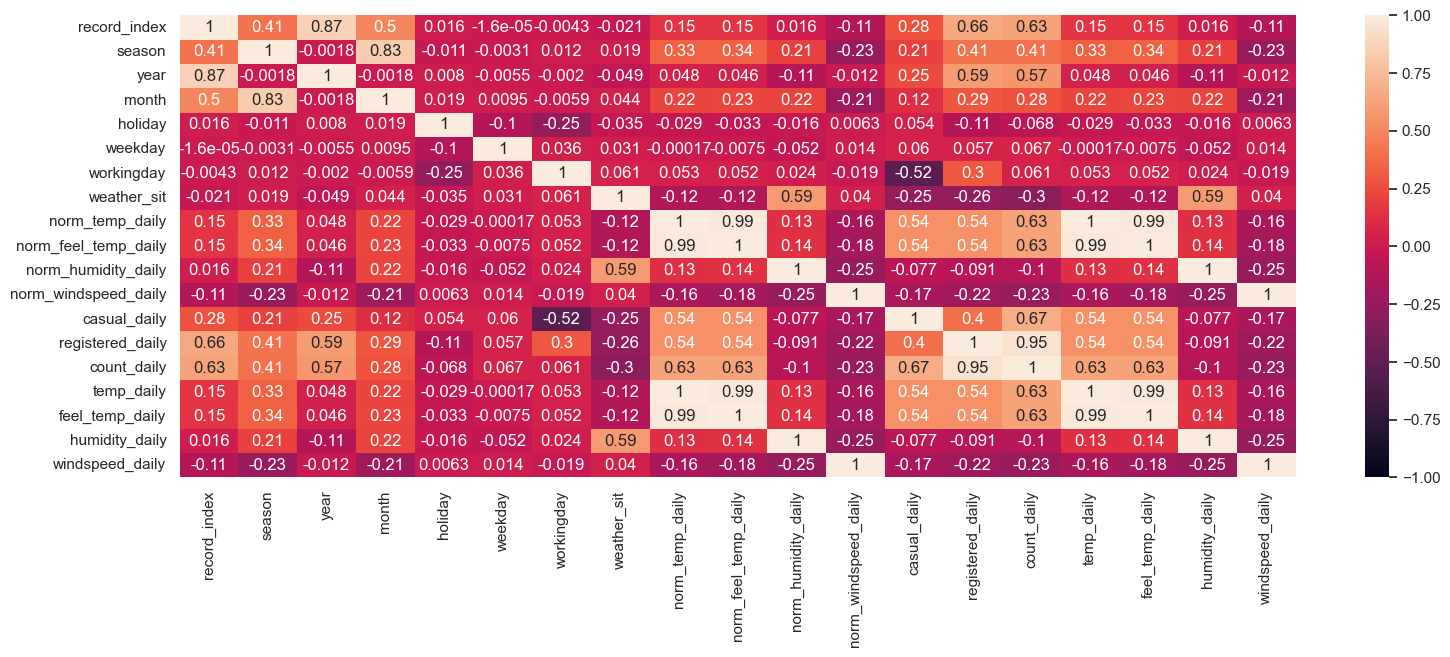

In [60]:
plt.figure(figsize=(18,6))
sns.heatmap(df_daily.corr(), annot=True, vmin=-1, vmax=1)

**Dropping Unnecessary Columns**

In [61]:
df_daily.columns

Index(['record_index', 'day_date', 'season', 'year', 'month', 'holiday',
       'weekday', 'workingday', 'weather_sit', 'norm_temp_daily',
       'norm_feel_temp_daily', 'norm_humidity_daily', 'norm_windspeed_daily',
       'casual_daily', 'registered_daily', 'count_daily', 'temp_daily',
       'feel_temp_daily', 'humidity_daily', 'windspeed_daily'],
      dtype='object')

In [62]:
df_daily.drop(columns=['norm_temp_daily',
       'norm_feel_temp_daily', 'norm_humidity_daily', 'norm_windspeed_daily',
       'casual_daily', 'registered_daily',"record_index","day_date"], inplace=True)

In [63]:
df_daily.describe()

season        year       month     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weather_sit  count_daily  temp_daily  feel_temp_daily  humidity_daily  \
count   731.000000   731.000000  731.000000       731.000000      731.000000   
mean      1.395349  4504.348837   15.283085        14.294637       62.789406   
std       0.544894  1937.211452    8.603397         7.659175       14.242910   
min       1.000000    22.000000   -5.220871        -4.283729        0.000000   
25%       1.000000  3152.000000    7.842925         7.878597       52.000000   
50%       1.000000  4548.000000   15.421651        14.876451       62.666700   
75%       2.000000  5956.000000   22.804575        20.604294       73.020850   
max       3.000000  8714.000000   32.498349        31.522112       97.250000   

       windspeed_daily  
count       731.000000  
mean         12.762576  
std           5.192357  
min           1.500244  
25%           9.041650  
50%          12.125325  
75%          15.625371  
max          34.000021

### Handling Outliers

In [64]:
df_daily.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_sit', 'count_daily', 'temp_daily', 'feel_temp_daily',
       'humidity_daily', 'windspeed_daily'],
      dtype='object')

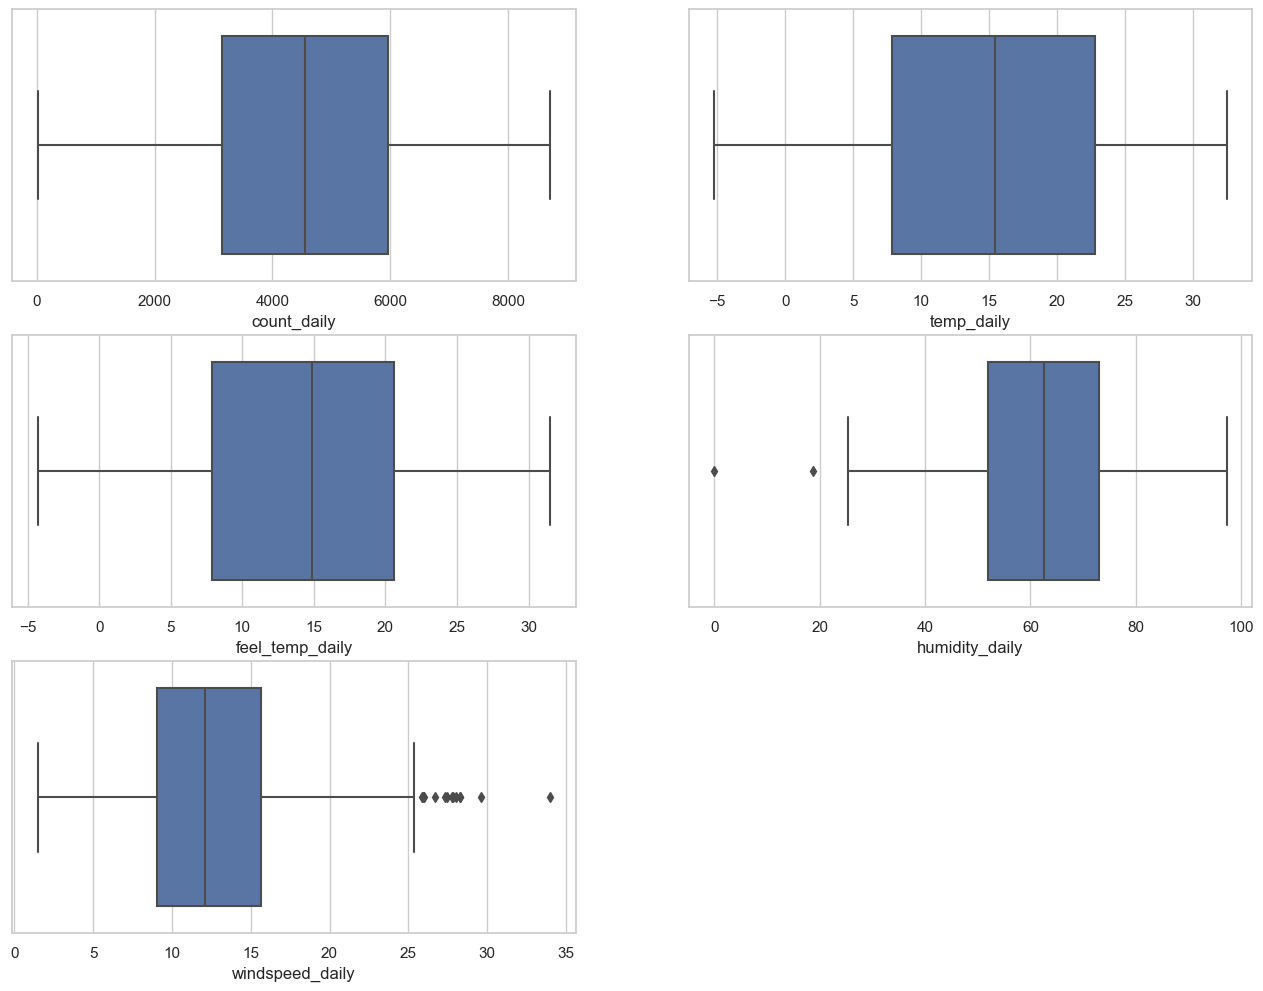

<Figure size 1200x300 with 0 Axes>

In [65]:
plt.figure(figsize=(16,12))
plotnumber = 1
for i in df_daily[['count_daily', 'temp_daily', 'feel_temp_daily',
       'humidity_daily', 'windspeed_daily']]:
  plt.subplot(3,2,plotnumber)
  sns.boxplot(x=i,data=df_daily)
  plotnumber += 1
plt.show()
plt.tight_layout()

In [66]:
for column in df_daily[['humidity_daily', 'windspeed_daily']]:
    df_daily[column]=np.where(df_daily[column] < df_daily[column].quantile(0.05), df_daily[column].quantile(0.05), df_daily[column])
    df_daily[column]=np.where(df_daily[column] > df_daily[column].quantile(0.95), df_daily[column].quantile(0.95), df_daily[column])

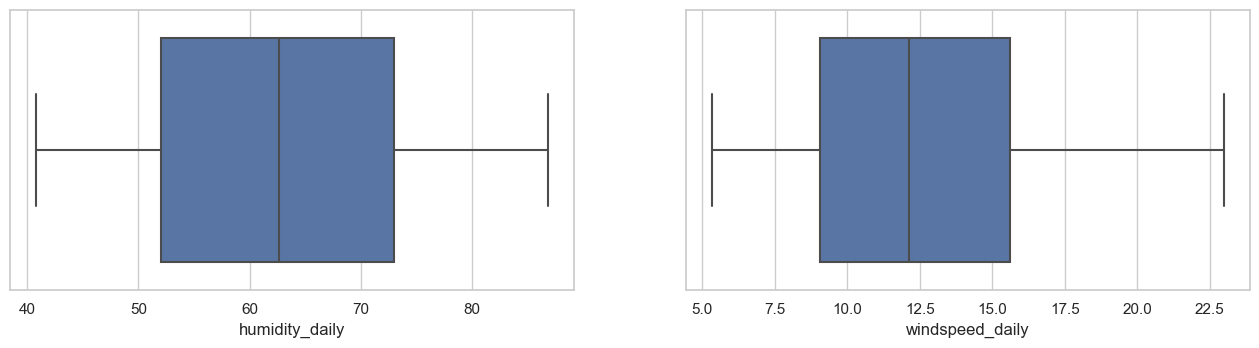

<Figure size 1200x300 with 0 Axes>

In [67]:
plt.figure(figsize=(16,8))
plotnumber = 1
for i in df_daily[['humidity_daily', 'windspeed_daily']]:
  plt.subplot(2,2,plotnumber)
  sns.boxplot(x=i,data=df_daily)
  plotnumber += 1
plt.show()
plt.tight_layout()

In [68]:
df_daily.describe()

season        year       month     holiday     weekday  workingday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.496580    0.500684    6.519836    0.028728    2.997264    0.683995   
std      1.110807    0.500342    3.451913    0.167155    2.004787    0.465233   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weather_sit  count_daily  temp_daily  feel_temp_daily  humidity_daily  \
count   731.000000   731.000000  731.000000       731.000000      731.000000   
mean      1.395349  4504.348837   15.283085        14.294637       62.905859   
std       0.544894  1937.211452    8.603397         7.659175       13.182255   
min       1.000000    22.000000   -5.220871        -4.283729       40.745450   
25%       1.000000  3152.000000    7.842925         7.878597       52.000000   
50%       1.000000  4548.000000   15.421651        14.876451       62.666700   
75%       2.000000  5956.000000   22.804575        20.604294       73.020850   
max       3.000000  8714.000000   32.498349        31.522112       86.854150   

       windspeed_daily  
count       731.000000  
mean         12.704000  
std           4.801104  
min           5.334316  
25%           9.041650  
50%          12.125325  
75%          15.625371  
max          22.999961

### Rearanging Columns

In [69]:
df_daily.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_sit', 'count_daily', 'temp_daily', 'feel_temp_daily',
       'humidity_daily', 'windspeed_daily'],
      dtype='object')

In [70]:
df_daily = df_daily[['season', 'year', 'month', 'holiday', 'weekday', 'workingday','weather_sit','temp_daily', 'feel_temp_daily',
       'humidity_daily', 'windspeed_daily','count_daily']]

In [71]:
df_daily.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_sit', 'temp_daily', 'feel_temp_daily', 'humidity_daily',
       'windspeed_daily', 'count_daily'],
      dtype='object')

### Scaling the Data

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
std = StandardScaler()

In [74]:
scaled_daily = std.fit_transform(df_daily)

In [75]:
scaled_daily

array([[-1.34821315, -1.00136893, -1.60016072, ...,  1.34192097,
        -0.40729299, -1.81795256],
       [-1.34821315, -1.00136893, -1.60016072, ...,  0.50882269,
         0.82289734, -1.91299949],
       [-1.34821315, -1.00136893, -1.60016072, ..., -1.45587303,
         0.81968546, -1.62992496],
       ...,
       [-1.34821315,  0.99863295,  1.58866019, ...,  0.94022771,
        -0.91090115, -1.63405743],
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.10622469,
         2.14596673, -1.39902293],
       [-1.34821315,  0.99863295,  1.58866019, ..., -0.39138893,
        -0.48549518, -0.91707305]])

In [76]:
scaled_df_daily= pd.DataFrame(data = scaled_daily, columns = df_daily.columns)

In [77]:
scaled_df_daily

season      year     month   holiday   weekday  workingday  \
0   -1.348213 -1.001369 -1.600161 -0.171981  1.498809   -1.471225   
1   -1.348213 -1.001369 -1.600161 -0.171981 -1.496077   -1.471225   
2   -1.348213 -1.001369 -1.600161 -0.171981 -0.996930    0.679706   
3   -1.348213 -1.001369 -1.600161 -0.171981 -0.497782    0.679706   
4   -1.348213 -1.001369 -1.600161 -0.171981  0.001366    0.679706   
..        ...       ...       ...       ...       ...         ...   
726 -1.348213  0.998633  1.588660 -0.171981  0.500513    0.679706   
727 -1.348213  0.998633  1.588660 -0.171981  0.999661    0.679706   
728 -1.348213  0.998633  1.588660 -0.171981  1.498809   -1.471225   
729 -1.348213  0.998633  1.588660 -0.171981 -1.496077   -1.471225   
730 -1.348213  0.998633  1.588660 -0.171981 -0.996930    0.679706   

     weather_sit  temp_daily  feel_temp_daily  humidity_daily  \
0       1.110427   -0.826662        -0.679946        1.341921   
1       1.110427   -0.721095        -0.740652        0.508823   
2      -0.726048   -1.634657        -1.749767       -1.455873   
3      -0.726048   -1.614780        -1.610270       -0.293197   
4      -0.726048   -1.467414        -1.504971       -1.458272   
..           ...         ...              ...             ...   
726     1.110427   -1.318665        -1.521108        0.181113   
727     1.110427   -1.323224        -1.346690       -0.296500   
728     1.110427   -1.323224        -1.424344        0.940228   
729    -0.726048   -1.309558        -1.490049       -1.106225   
730     1.110427   -1.528225        -1.540482       -0.391389   

     windspeed_daily  count_daily  
0          -0.407293    -1.817953  
1           0.822897    -1.912999  
2           0.819685    -1.629925  
3          -0.409388    -1.519898  
4          -0.037871    -1.500269  
..               ...          ...  
726         2.145967    -1.234757  
727        -0.476767    -0.728012  
728        -0.910901    -1.634057  
729         2.145967    -1.399023  
730        -0.485495    -0.917073  

[731 rows x 12 columns]

In [78]:
scaled_df_daily.iloc[:, :-1]

season      year     month   holiday   weekday  workingday  \
0   -1.348213 -1.001369 -1.600161 -0.171981  1.498809   -1.471225   
1   -1.348213 -1.001369 -1.600161 -0.171981 -1.496077   -1.471225   
2   -1.348213 -1.001369 -1.600161 -0.171981 -0.996930    0.679706   
3   -1.348213 -1.001369 -1.600161 -0.171981 -0.497782    0.679706   
4   -1.348213 -1.001369 -1.600161 -0.171981  0.001366    0.679706   
..        ...       ...       ...       ...       ...         ...   
726 -1.348213  0.998633  1.588660 -0.171981  0.500513    0.679706   
727 -1.348213  0.998633  1.588660 -0.171981  0.999661    0.679706   
728 -1.348213  0.998633  1.588660 -0.171981  1.498809   -1.471225   
729 -1.348213  0.998633  1.588660 -0.171981 -1.496077   -1.471225   
730 -1.348213  0.998633  1.588660 -0.171981 -0.996930    0.679706   

     weather_sit  temp_daily  feel_temp_daily  humidity_daily  windspeed_daily  
0       1.110427   -0.826662        -0.679946        1.341921        -0.407293  
1       1.110427   -0.721095        -0.740652        0.508823         0.822897  
2      -0.726048   -1.634657        -1.749767       -1.455873         0.819685  
3      -0.726048   -1.614780        -1.610270       -0.293197        -0.409388  
4      -0.726048   -1.467414        -1.504971       -1.458272        -0.037871  
..           ...         ...              ...             ...              ...  
726     1.110427   -1.318665        -1.521108        0.181113         2.145967  
727     1.110427   -1.323224        -1.346690       -0.296500        -0.476767  
728     1.110427   -1.323224        -1.424344        0.940228        -0.910901  
729    -0.726048   -1.309558        -1.490049       -1.106225         2.145967  
730     1.110427   -1.528225        -1.540482       -0.391389        -0.485495  

[731 rows x 11 columns]

# Model Building

### Splitting the data into training and test sets

In [79]:
# Importing Necessary Libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [80]:
#Step 1 Independent and dependent variable creation
X=scaled_df_daily.iloc[:, :-1] ## X variable contains all inputs
y=scaled_df_daily.count_daily ## y is output

In [81]:
y

0     -1.817953
1     -1.912999
2     -1.629925
3     -1.519898
4     -1.500269
         ...   
726   -1.234757
727   -0.728012
728   -1.634057
729   -1.399023
730   -0.917073
Name: count_daily, Length: 731, dtype: float64

In [82]:
# Step 2 Traning and testing data creation
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=35)

In [83]:
y_train

717    0.543757
383   -0.626250
647    0.975084
304   -0.225400
503    1.619233
         ...   
249   -1.295711
448   -0.584925
33    -1.526097
271    0.172867
713    0.571651
Name: count_daily, Length: 511, dtype: float64

## Linear Model

In [84]:
from yellowbrick.regressor import PredictionError

In [85]:
# Step 3 Creating model
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression
LR_y_predict=LR.predict(X_test)

In [86]:
LR_y_train_predict=LR.predict(X_train)

In [87]:
y_test # Actual values

339   -0.986809
165    0.349014
161    0.238470
366   -1.318956
337   -0.526554
         ...   
462    1.215284
10    -1.674349
502    1.487511
162   -0.022909
576    1.343391
Name: count_daily, Length: 220, dtype: float64

In [88]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
LR_r2score_test=r2_score(y_test,LR_y_predict)
LR_r2score_test

0.8363101691275573

In [89]:
LR_train_score=r2_score(y_train,LR_y_train_predict)
LR_train_score

0.7797881606871914

In [90]:
import math
print(mean_squared_error(y_test,LR_y_predict))
print(math.sqrt(mean_squared_error(y_test,LR_y_predict))) # root mean squared error

0.16704521217002008
0.40871164917337516


In [91]:
print(mean_absolute_error(y_test,LR_y_predict))

0.3152284659962378


In [92]:
LR_adjusted_r2_score = 1 - (((1-LR_r2score_test)*(220-1))/(220-10-1))

In [93]:
LR_adjusted_r2_score

0.8284781198035169

A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this plot by comparing against the 45 degree line, where the prediction exactly matches the model.

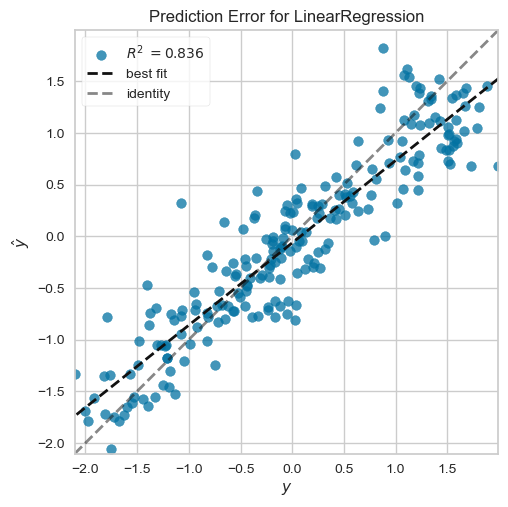

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [94]:
visualizer_LR = PredictionError(LR)

visualizer_LR.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_LR.score(X_test, y_test)  # Evaluate the model on the test data
visualizer_LR.show()                 # Finalize and render the figure

## Decision Tree

In [95]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

In [96]:
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [97]:
DT_y_test_predict=DT.predict(X_test)

In [98]:
DT_test_r2_score = r2_score(y_test,DT_y_test_predict)
DT_test_r2_score

0.7750979551474763

In [99]:
DT_y_train_predict=DT.predict(X_train)

DT_train_r2_score = r2_score(y_train,DT_y_train_predict)
DT_train_r2_score

1.0

In [100]:
DT.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

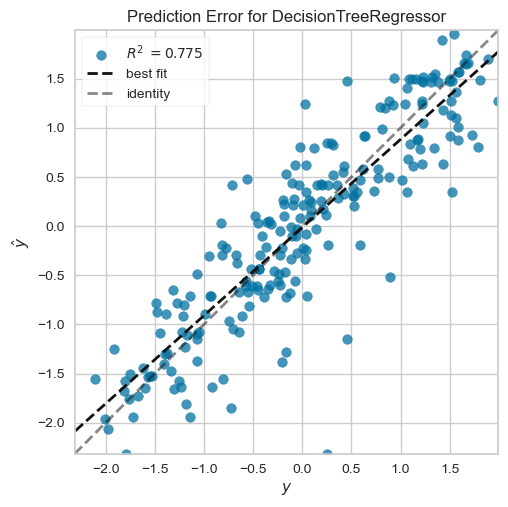

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [101]:
visualizer_DT = PredictionError(DT)

visualizer_DT.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_DT.score(X_test, y_test)  # Evaluate the model on the test data
visualizer_DT.show()                 # Finalize and render the figure

### _Hyperparametere Tunning in Decision Tree Regressor_

In [102]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'min_samples_leaf': [ 2,  4,  6,  8, 10,  12,  14,  16,  18,  20],
          'min_samples_split': [ 2, 4, 6, 8, 10, 12, 13, 14, 16, 18, 20],
          "min_weight_fraction_leaf":[0.0,0.2,0.4],
          'random_state': [35,42],
          'splitter': ['best', 'random'],
          "max_leaf_nodes":[None, 20, 40,60,80] }
              

from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(params)
len(param_size)

66000

In [103]:
DT_tuned=DecisionTreeRegressor(max_depth=7, max_leaf_nodes= None, min_samples_leaf=2, min_samples_split=20, min_weight_fraction_leaf= 0.0, random_state=42, splitter='random')
DT_tuned.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=20,
                      random_state=42, splitter='random')

In [104]:
DT_tuned_y_train_predict = DT_tuned.predict(X_train)

In [105]:
DT_tuned_r2_value_train = r2_score(y_train, DT_tuned_y_train_predict)
DT_tuned_r2_value_train

0.8823061933046106

In [106]:
DT_tuned_y_test_predict = DT_tuned.predict(X_test)

In [107]:
DT_tuned_r2_value_test = r2_score(y_test, DT_tuned_y_test_predict)
DT_tuned_r2_value_test

0.8339295692628461

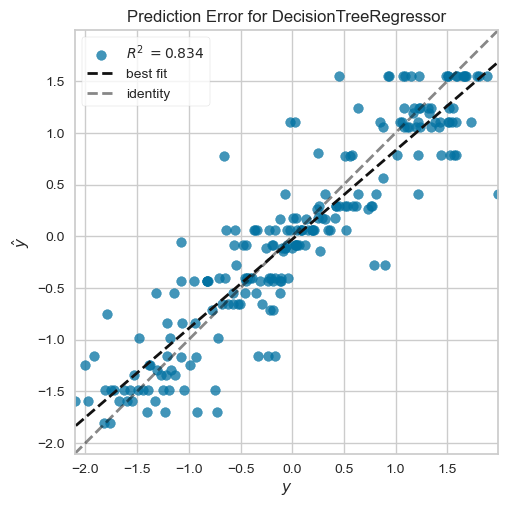

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [108]:
visualizer_DT_tuned = PredictionError(DT_tuned)

visualizer_DT_tuned.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_DT_tuned.score(X_test, y_test)  # Evaluate the model on the test data
visualizer_DT_tuned.show()                 # Finalize and render the figure

## Random Forest Regressor

In [109]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state=35)

In [110]:
RF.fit(X_train,y_train)

RandomForestRegressor(random_state=35)

In [111]:
RF_y_predict=RF.predict(X_test)

In [112]:
RF_test_r2_score = r2_score(y_test,RF_y_predict)
RF_test_r2_score

0.8957928982505667

In [113]:
RF_y_train_predict=RF.predict(X_train)

RF_train_r2_score = r2_score(y_train,RF_y_train_predict)
RF_train_r2_score

0.9808177545790993

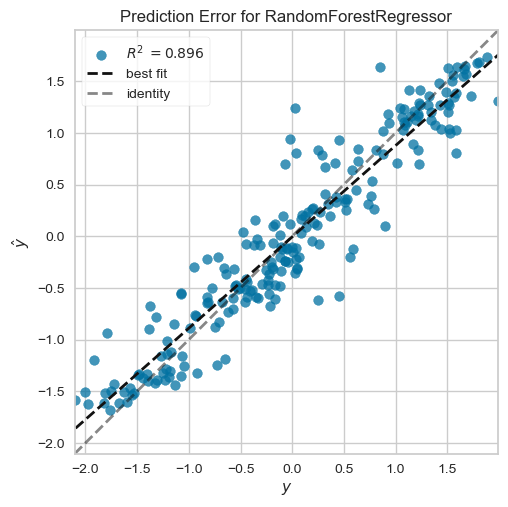

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [114]:
visualizer_RF = PredictionError(RF)

visualizer_RF.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_RF.score(X_test, y_test)  # Evaluate the model on the test data
visualizer_RF.show()  

### _Hyperparameter Tunning of Random Forest Model_

In [115]:
parameters ={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90],
     'criterion':["squared_error"],      
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1,2,4],
     'min_samples_split': [1,2,5,10],
     'n_estimators': [50,100,200,300],
     'bootstrap':[True, False],     
      'random_state':[35]}
from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(parameters)
len(param_size)

1728

In [116]:
RF_tuned = RandomForestRegressor(bootstrap=False, criterion='squared_error', max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=35)

In [117]:
RF_tuned.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_split=5, n_estimators=50, random_state=35)

In [118]:
RF_tuned_y_predict=RF_tuned.predict(X_test)

In [119]:
RF_tuned_test_r2_score = r2_score(y_test,RF_tuned_y_predict)
RF_tuned_test_r2_score

0.9001279699432371

In [120]:
RF_tuned_y_train_predict=RF_tuned.predict(X_train)

RF_tuned_train_r2_score = r2_score(y_train,RF_tuned_y_train_predict)
RF_tuned_train_r2_score

0.9912964166777534

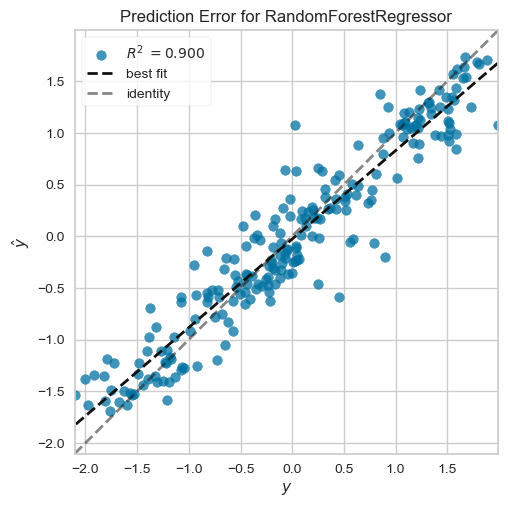

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [121]:
visualizer_RF_tuned = PredictionError(RF_tuned)
visualizer_RF_tuned.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_RF_tuned.score(X_test, y_test)  # Evaluate the model on the test data
visualizer_RF_tuned.show()  

0.9001279699432371

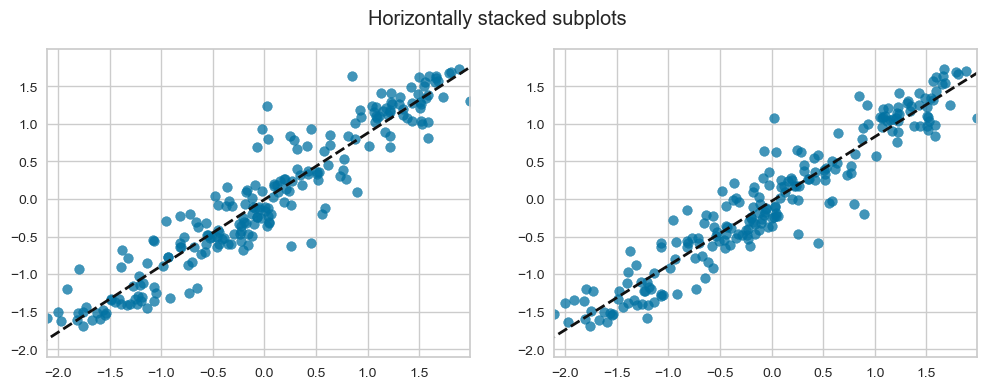

In [122]:
fig, axs=plt.subplots(1, 2, figsize = (12,4))
fig.suptitle('Horizontally stacked subplots')

visualizer_RF = PredictionError(RF, ax=axs[0])
visualizer_RF.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_RF.score(X_test, y_test)  # Evaluate the model on the test data


visualizer_RF_tuned = PredictionError(RF_tuned, ax=axs[1])
visualizer_RF_tuned.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_RF_tuned.score(X_test, y_test)  # Evaluate the model on the test data

## Gradient Boosting

In [123]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor() ## object creation
gbr.fit(X_train,y_train) ## fitting the data

GradientBoostingRegressor()

In [124]:
gbr_y_train_predict = gbr.predict(X_train)

In [125]:
gbr_y_test_predict = gbr.predict(X_test)

In [126]:
gbr_r2_value_test = r2_score(y_test,gbr_y_test_predict)
gbr_r2_value_test

0.8952511673364587

In [127]:
gbr_r2_value_train = r2_score(y_train,gbr_y_train_predict)
gbr_r2_value_train

0.9607785646100819

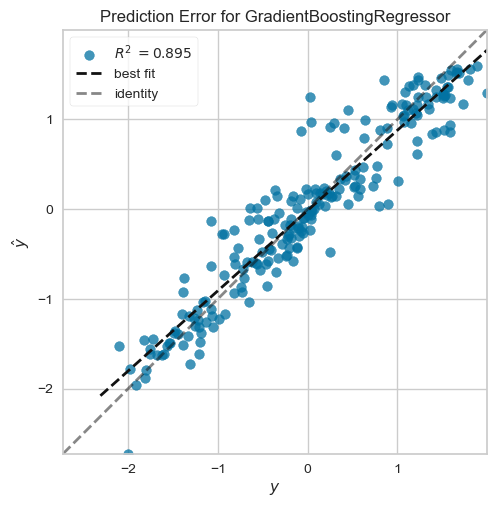

<AxesSubplot:title={'center':'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [128]:
visualizer_gbr = PredictionError(gbr)

visualizer_gbr.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_gbr.score(X_test, y_test)  # Evaluate the model on the test data
visualizer_gbr.show()      

### _Hyperparameter Tunning Gradient Boost Regressor_

In [129]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [130]:
params = {'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.2],
              'max_depth': [3,6, 10],
              'n_estimators': [50,100,200],
              'min_samples_leaf': [1,2,3,4],
              'min_samples_split': [1,2,3,5],
              'random_state':[35,42]}
# gamma --- It is for Tree prunning 
# reg_alpha and req_lambda ---- are for Regularization to make model free from overfitting 
#n_estimators--number of decision tree]
from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(params)
len(param_size)

1440

In [131]:
gbr_tuned=GradientBoostingRegressor(learning_rate=0.1, max_depth= 3, min_samples_leaf= 2, min_samples_split=2, n_estimators= 100, random_state=42)
gbr_tuned.fit(X_train,y_train)

GradientBoostingRegressor(min_samples_leaf=2, random_state=42)

In [132]:
gbr_tuned_y_train_predict = gbr_tuned.predict(X_train)

In [133]:
gbr_tuned_y_test_predict = gbr_tuned.predict(X_test)

In [134]:
gbr_tuned_r2_value_test = r2_score(y_test,gbr_tuned_y_test_predict)
gbr_r2_value_test

0.8952511673364587

In [135]:
gbr_tuned_r2_value_train = r2_score(y_train,gbr_tuned_y_train_predict)
gbr_tuned_r2_value_train

0.9600321438939725

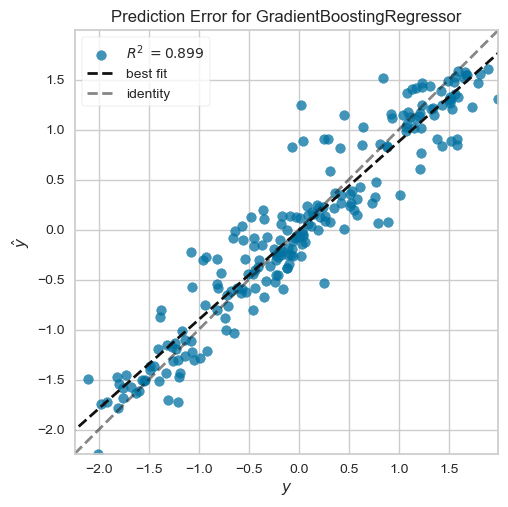

<AxesSubplot:title={'center':'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [136]:
visualizer_gbr_tuned = PredictionError(gbr_tuned)

visualizer_gbr_tuned.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_gbr_tuned.score(X_test, y_test)  # Evaluate the model on the test data
visualizer_gbr_tuned.show()      

## XGB Regressor

In [137]:
from xgboost import XGBRegressor#importing the model library
xgb=XGBRegressor() ## object creation
xgb.fit(X_train,y_train)# fitting the data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [138]:
xgb_y_train_predict = xgb.predict(X_train)

In [139]:
xgb_r2_value_train = r2_score(y_train,xgb_y_train_predict)
xgb_r2_value_train

0.999986648871403

In [140]:
xgb_y_test_predict = xgb.predict(X_test)

In [141]:
xgb_r2_value_test = r2_score(y_test,xgb_y_test_predict)
xgb_r2_value_test

0.879299689850066

In [142]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

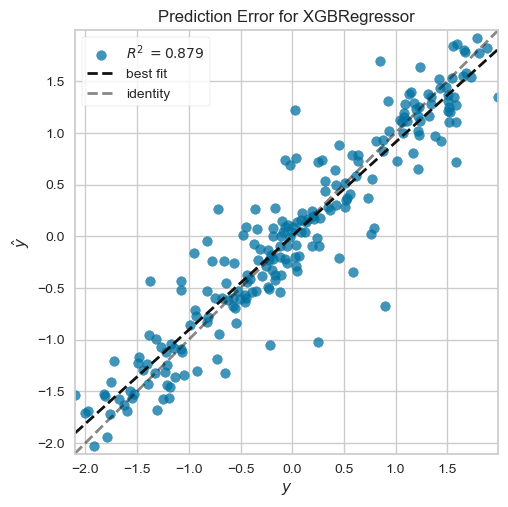

<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [143]:
visualizer_xgb = PredictionError(xgb)

visualizer_xgb .fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_xgb .score(X_test, y_test)  # Evaluate the model on the test data
visualizer_xgb .show()      

### _Hyperparameter Tunning in XGB Regressor_

In [144]:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.2],
              'reg_alpha': [0.2,0.4,0.8],
              'max_depth': [3,6,10],
              'n_estimators': [50,100,200,300],
              'reg_lambda': [0,0.1,0.2,0.4,0.8],
              'gamma': [0,0.1,0.2,0.4,0.8]}
# gamma --- It is for Tree prunning 
# reg_alpha and req_lambda ---- are for Regularization to make model free from overfitting 
#n_estimators--number of decision tree]
from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(params)
len(param_size)

4500

In [145]:
XGB_tuned=XGBRegressor(reg_lambda= 0.4, reg_alpha=0.8, n_estimators=200, max_depth=3, learning_rate=0.2, gamma=0)
XGB_tuned.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [146]:
XGB_tuned_y_train_predict = XGB_tuned.predict(X_train)

In [147]:
XGB_tuned_r2_value_train = r2_score(y_train,XGB_tuned_y_train_predict)
XGB_tuned_r2_value_train

0.9753085588845591

In [148]:
XGB_tuned_y_test_predict = XGB_tuned.predict(X_test)

In [149]:
XGB_tuned_r2_value_test = r2_score(y_test,XGB_tuned_y_test_predict)
XGB_tuned_r2_value_test

0.9009002230464653

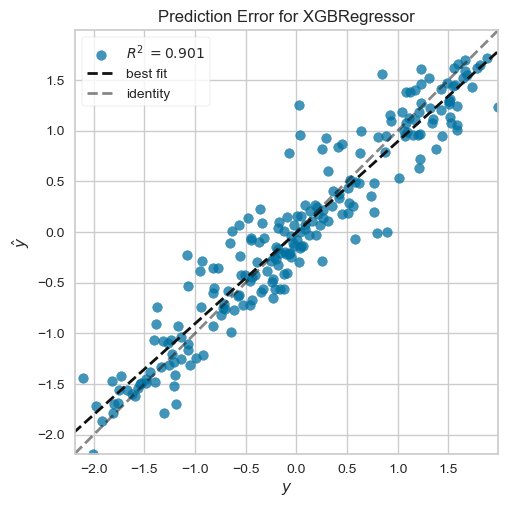

<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [150]:
visualizer_XGB_tuned = PredictionError(XGB_tuned)

visualizer_XGB_tuned .fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_XGB_tuned .score(X_test, y_test)  # Evaluate the model on the test data
visualizer_XGB_tuned .show()      

## Support Vector Regressor

In [151]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [152]:
svr_y_train_predict = svr.predict(X_train)

In [153]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

In [154]:
svr_r2_value_train= r2_score(y_train,svr_y_train_predict) 
svr_r2_value_train

0.937902682098551

In [155]:
svr_adjusted_r2_train = 1 - (((1-svr_r2_value_train)*(511-1))/(511-10-1))
svr_adjusted_r2_train

0.936660735740522

In [156]:
svr_y_test_predict = svr.predict(X_test)

In [157]:
svr_r2_value_test = r2_score(y_test,svr_y_test_predict)
svr_r2_value_test

0.912790745525956

In [158]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

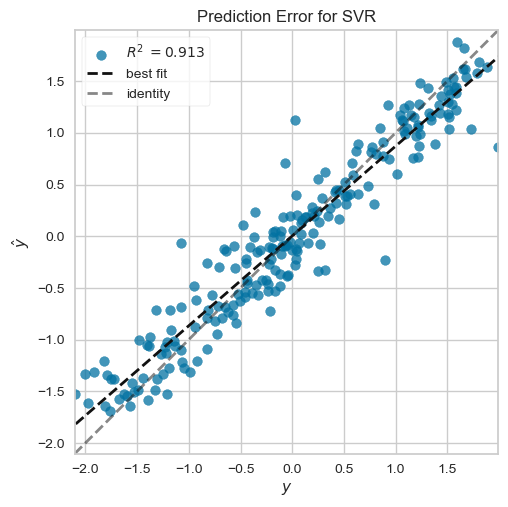

<AxesSubplot:title={'center':'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [159]:
visualizer_svr = PredictionError(svr)

visualizer_svr.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_svr.score(X_test, y_test)  # Evaluate the model on the test data
visualizer_svr.show()